# 5️⃣ Modeling

#### 1️⃣ Import Library yang Diperlukan

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n✅ Library berhasil diimport")


✅ Library berhasil diimport


#### 2️⃣ Muat Dataset

In [2]:
# Load dataset
train_df = pd.read_csv("../data/processed/house_prices_train.csv")
test_df = pd.read_csv("../data/processed/house_prices_test.csv")
val_df = pd.read_csv("../data/processed/house_prices_val.csv")

print("\n✅ Dataset berhasil dimuat")



✅ Dataset berhasil dimuat


#### 3️⃣ Memisahkan Fitur(x) dan Target(Y)

In [3]:
# Tentukan fitur yang digunakan (X) dan target (y)
features = ["installment", "bedroom_count", "bathroom_count", "carport_count", "land_area", "building_area", "location_encoded"]
target = "price"

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]
X_val, y_val = val_df[features], val_df[target]

print("\n✅ Fitur dan target berhasil ditentukan")


✅ Fitur dan target berhasil ditentukan


#### 4️⃣ Buat Model XGBoost

In [4]:
# Inisialisasi model XGBoost
model = XGBRegressor(
    n_estimators=200,  # Jumlah pohon
    learning_rate=0.1,  # Seberapa cepat model belajar
    max_depth=6,  # Kedalaman pohon
    subsample=0.8,  # Proporsi data yang digunakan dalam setiap pohon
    colsample_bytree=0.8,  # Proporsi fitur yang digunakan
    random_state=42
)

#### 5️⃣ Train Model

In [5]:
# Latih model menggunakan dataset training
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### 6️⃣ Evaluasi Model

In [ ]:
# Prediksi pada test set dan validation set
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

# Hitung metrik evaluasi
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"📌 MAE: {mae:.2f}")
    print(f"📌 MSE: {mse:.2f}")
    print(f"📌 RMSE: {rmse:.2f}")
    print(f"📌 R² Score: {r2:.4f}")

print("📊 Evaluasi pada Test Set:")
evaluate_model(y_test, y_pred_test)

print("\n📊 Evaluasi pada Validation Set:")
evaluate_model(y_val, y_pred_val)


📊 Evaluasi pada Test Set:
📌 MAE: 80370344.26
📌 MSE: 12410634793507630.00
📌 RMSE: 111403028.66
📌 R² Score: 0.9975

📊 Evaluasi pada Validation Set:
📌 MAE: 80022700.72
📌 MSE: 11337682616843162.00
📌 RMSE: 106478554.73
📌 R² Score: 0.9978


#### 7️⃣ Visualisasi Hasil Feature Importance

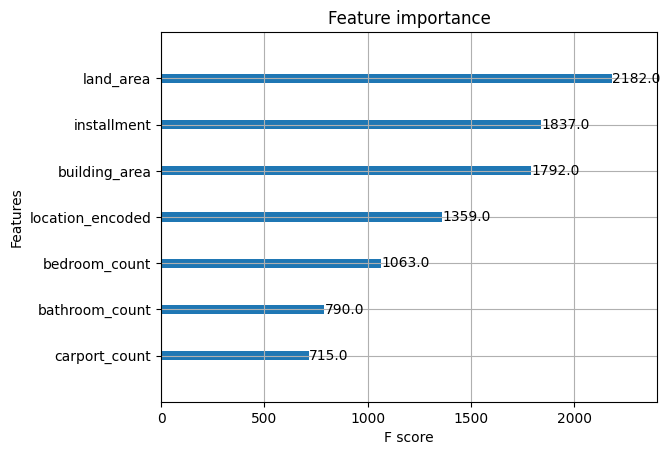

In [7]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(model)
plt.show()

#### 8️⃣ Tunning Hyperparameter

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Tentukan parameter yang akan dituning
param_dist = {
    "n_estimators": np.arange(100, 500, 50),
    "learning_rate": np.linspace(0.01, 0.2, 5),
    "max_depth": np.arange(3, 10, 2),
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Inisialisasi model
xgb = XGBRegressor(random_state=42)

# Random Search CV
random_search = RandomizedSearchCV(xgb, param_dist, n_iter=20, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1)
random_search.fit(X_train, y_train)

# Hasil tuning
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': np.int64(200), 'max_depth': np.int64(5), 'learning_rate': np.float64(0.0575), 'colsample_bytree': 1.0}


#### 9️⃣ Buat Model Kembali Sesuai dengan Tunning Hyperparameter

In [9]:
# Import library
from xgboost import XGBRegressor

# Buat model dengan hyperparameter terbaik
best_model = XGBRegressor(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.0575,
    colsample_bytree=1.0,
    random_state=42
)

# Train model dengan dataset training
best_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0575, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### 1️⃣0️⃣ Evaluasi Model Setelah Tunning Hyperparameter

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi ulang pada Test Set dan Validation Set
y_pred_test = best_model.predict(X_test)
y_pred_val = best_model.predict(X_val)

# Fungsi evaluasi
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"📌 MAE: {mae:.2f}")
    print(f"📌 MSE: {mse:.2f}")
    print(f"📌 RMSE: {rmse:.2f}")
    print(f"📌 R² Score: {r2:.4f}")

# Evaluasi hasil
print("📊 Evaluasi setelah Hyperparameter Tuning pada Test Set:")
evaluate_model(y_test, y_pred_test)

print("\n📊 Evaluasi setelah Hyperparameter Tuning pada Validation Set:")
evaluate_model(y_val, y_pred_val)


📊 Evaluasi setelah Hyperparameter Tuning pada Test Set:
📌 MAE: 56565309.08
📌 MSE: 4937880536749392.00
📌 RMSE: 70270054.34
📌 R² Score: 0.9990

📊 Evaluasi setelah Hyperparameter Tuning pada Validation Set:
📌 MAE: 57781436.72
📌 MSE: 4986097999760318.00
📌 RMSE: 70612307.71
📌 R² Score: 0.9990


#### 1️⃣1️⃣ Melihat yang Kolom yang Paling Mempengaruhi Harga Rumah

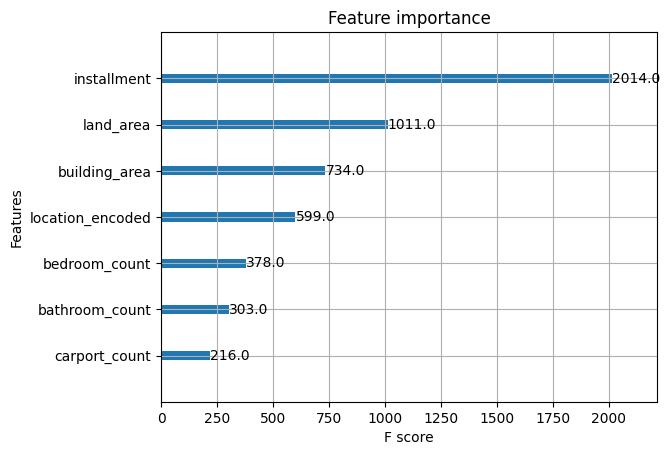

In [11]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(best_model)
plt.show()


#### 1️⃣2️⃣ Menyimpan Model

In [12]:
import joblib
joblib.dump(best_model, "../models/xgboost_house_price_model.pkl")
print("✅ Model berhasil disimpan!")


✅ Model berhasil disimpan!


#### 1️⃣3️⃣ Melihat Data Sesungguhnya dengan Data Hasil Prediksi Model

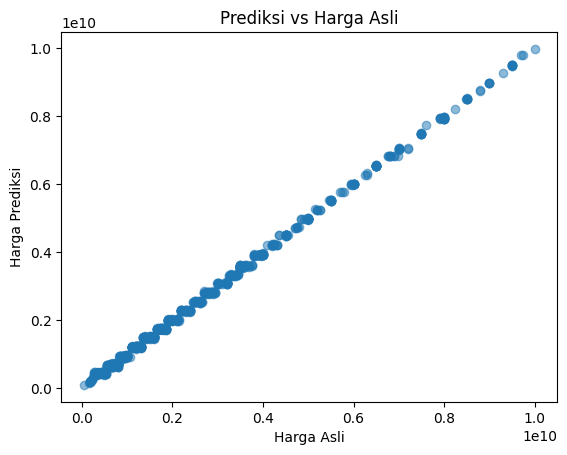

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Harga Asli")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Harga Asli")
plt.show()
